In [1]:
import pandas as pd
PATH = '../../datos/datos_por_estacion/SUROESTE.xlsx'
data_2021 = pd.read_excel(PATH, sheet_name='2021')
data_2022 = pd.read_excel(PATH, sheet_name='2022')
data_2023 = pd.read_excel(PATH, sheet_name='2023')
data_2024 = pd.read_excel(PATH, sheet_name='2024')
data_2025 = pd.read_excel(PATH, sheet_name='2025')

listado_dfs = [data_2021, data_2022, data_2023, data_2024, data_2025]

df = pd.concat(listado_dfs, ignore_index=True)

In [2]:
df.columns

Index(['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF',
       'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR', 'WDV'],
      dtype='object')

In [3]:
import sys
sys.path.append('..')
import imputar_datos
import importlib

importlib.reload(imputar_datos)

<module 'imputar_datos' from '/Users/marielalvarez/2025/5to_sem/multivariados/RETO/ETAPA2/suroeste/../imputar_datos.py'>

In [4]:
from imputar_datos import *

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df_imputed = imputar_multivariado(df, time_col="date")

/Users/marielalvarez/2025/5to_sem/multivariados/RETO/ETAPA2/suroeste/../imputar_datos.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.set_index(time_col).asfreq("H")  # asegurar frecuencia horaria


In [7]:
df_imputed.reset_index(inplace=True)


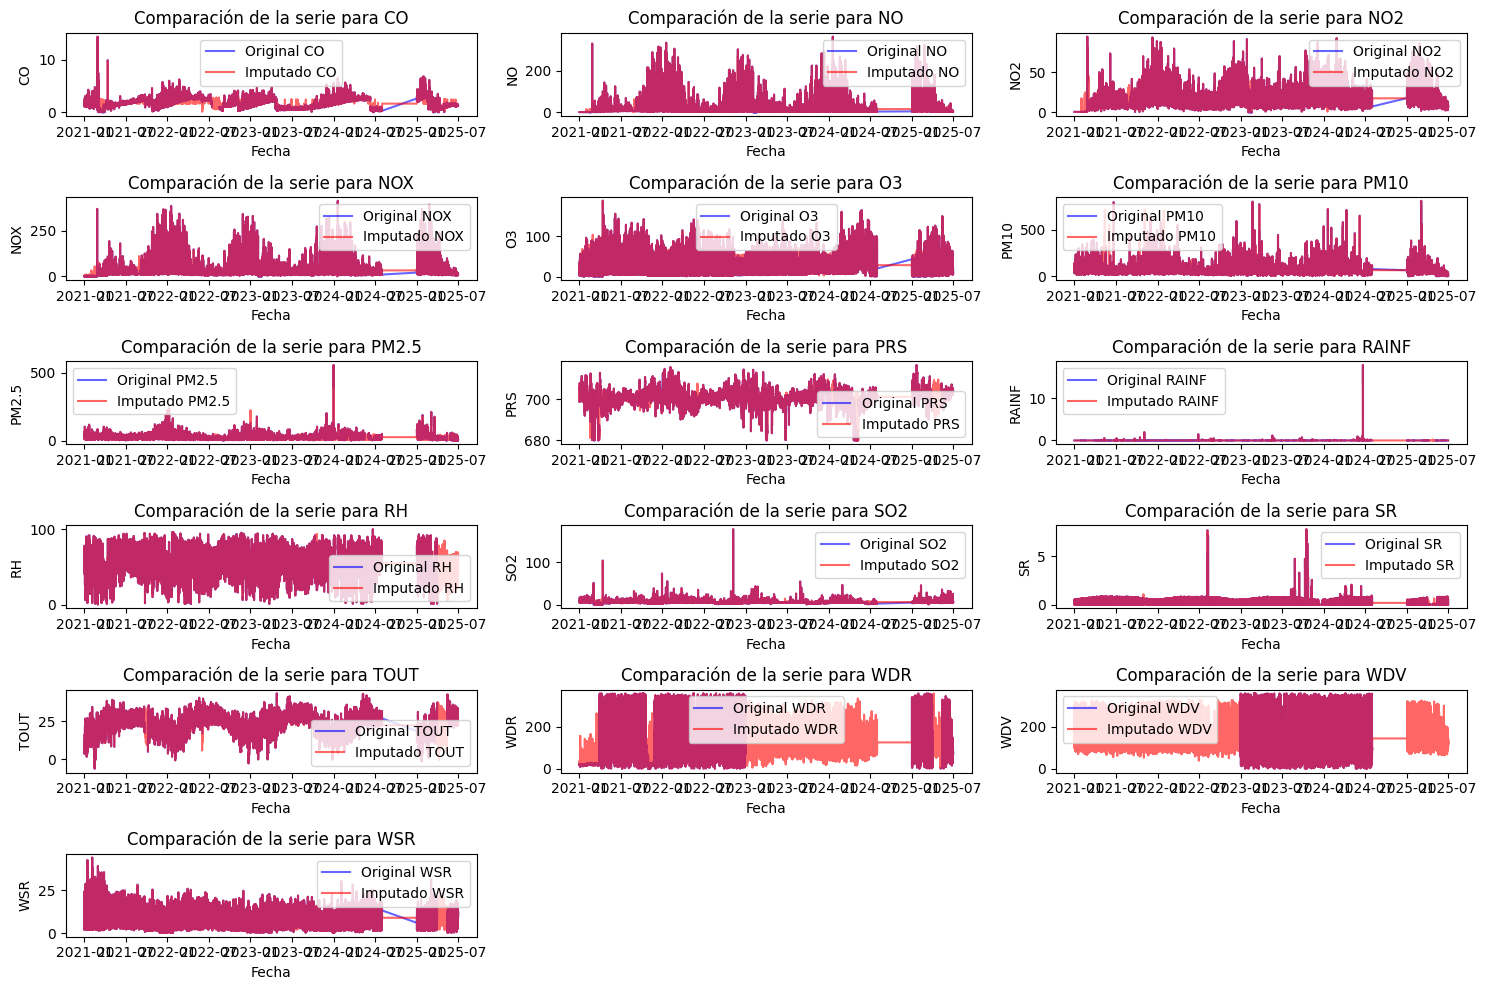

In [8]:
import matplotlib.pyplot as plt
variables = df.columns.difference(['date'])

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(len(variables)//3+1, 3, i+1)  # Crear subgráficos
    plt.plot(df['date'], df[var], label=f'Original {var}', color='blue', alpha=0.6)
    plt.plot(df_imputed['date'], df_imputed[var], label=f'Imputado {var}', color='red', alpha=0.6)
    plt.xlabel('Fecha')
    plt.ylabel(var)
    plt.title(f'Comparación de la serie para {var}')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df_imputed.to_excel('../../datos/datos_imputados/SUROESTE_IMPUTADO.xlsx', index=False)